### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [3]:
data = pd.read_csv(3'mail_data.csv')

In [4]:
pd.DataFrame(data)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
data.shape

(5572, 2)

In [8]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing

##### Checking of null values

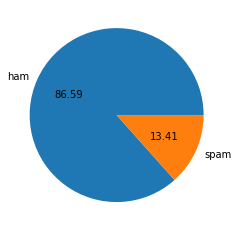

In [71]:
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.isnull().count()

Category    5572
Message     5572
dtype: int64

In [9]:
df = data.where((pd.notnull(data)),'')

##### Encoding the features
##### 0 - ham  1 - spam

In [10]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [11]:
df['Category'] = enc.fit_transform(df['Category'])

In [12]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


##### Arranging feature vector and target vector

In [13]:
x = df['Message']
y = df['Category']

In [14]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [15]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32

In [19]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10,random_state=3,shuffle=True)

In [20]:
for train,test in cv.split(x):
    x_train,x_test = x[train], x[test]
    y_train,y_test = y[train], y[test]

#####  Extracting Features

In [54]:
x_train.shape

(5015,)

In [55]:
x_test.shape

(557,)

In [56]:
y_test.shape

(557,)

In [57]:
y_train.shape

(5015,)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
ext = TfidfVectorizer(min_df=1, stop_words='english',lowercase='True')

In [52]:
x_train_feature = ext.fit_transform(x_train)

In [53]:
x_test_feature = ext.transform(x_test)

In [39]:
print(x_train_feature)

  (0, 7649)	0.19869000221998492
  (0, 997)	0.34856340585734097
  (0, 3308)	0.16349656324152625
  (0, 1884)	0.2938224636523055
  (0, 1613)	0.34856340585734097
  (0, 4133)	0.2938224636523055
  (0, 7839)	0.23786643348624778
  (0, 3345)	0.193695491976749
  (0, 1615)	0.2938224636523055
  (0, 1205)	0.26180106520821567
  (0, 2141)	0.2717247790886524
  (0, 5463)	0.2717247790886524
  (0, 4010)	0.34856340585734097
  (1, 5105)	0.5524940239919238
  (1, 7750)	0.4307919102579469
  (1, 3980)	0.5249535189466797
  (1, 4162)	0.4013903780323789
  (1, 5080)	0.2692178502217908
  (2, 72)	0.237074224888515
  (2, 1067)	0.17043934766237923
  (2, 5772)	0.17133307818057095
  (2, 7343)	0.12639275614431802
  (2, 6697)	0.19804983511814958
  (2, 5724)	0.18367001882110412
  (2, 5823)	0.1687327556586908
  :	:
  (5010, 427)	0.23376253235451463
  (5010, 4867)	0.247878627859091
  (5010, 7816)	0.19159089232197932
  (5010, 1890)	0.18711618926953785
  (5010, 5613)	0.19666389223953007
  (5010, 5772)	0.23122885596064635
  (50

In [58]:
x_train_feature.shape

(5015, 7993)

In [59]:
x_test_feature.shape

(557, 7993)

### Training The Model

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_feature,y_train)

LogisticRegression()

### Evaluating the model

##### Predicting training data

In [47]:
y_pred = model.predict(x_train_feature)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

##### Accuracy score of training data

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred))

0.9708873379860419


##### Predicting test data

In [63]:
y_test_pred = model.predict(x_test_feature)

In [64]:
print(accuracy_score(y_test_pred,y_test))

0.9605026929982047


##### Predicting Values

In [65]:
input_data = ['WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']
input_data_f = ext.transform(input_data)

In [66]:
pred = model.predict(input_data_f)

In [67]:
print(pred)

[1]


### Importing model

In [68]:
import pickle

In [73]:
pickle.dump(model,open('model.pkl','wb'))

In [74]:
pickle.dump(ext,open('vect.pkl','wb'))